## A machine learning model to accurately classify whether or not the patients in the dataset have diabetes or not. 

Importing all basic Recquired Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


# Check the Data

 *   Checking what kind of data is given
 *  Checking the info about different columns in the data
 *   Checking the statistical description of data



In [2]:
df = pd.read_csv(r'Pima_Indian_diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               742 non-null    float64
 1   Glucose                   752 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             746 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       749 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Missing Values


 *  Using seaborn to create heatmaps to check where values are missing



Text(0.5, 1, 'Heat Map To Find Missing Values')

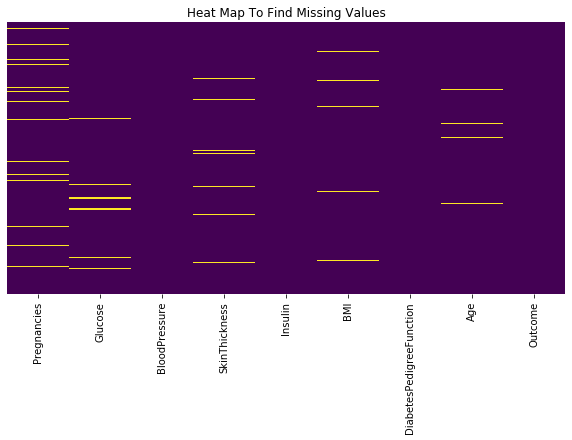

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heat Map To Find Missing Values')

In [7]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)
df.isnull().sum()

Pregnancies                  26
Glucose                      21
BloodPressure                 0
SkinThickness               237
Insulin                     374
BMI                          21
DiabetesPedigreeFunction      0
Age                          19
Outcome                       0
dtype: int64

Text(0.5, 1, 'Heat Map of Null Values')

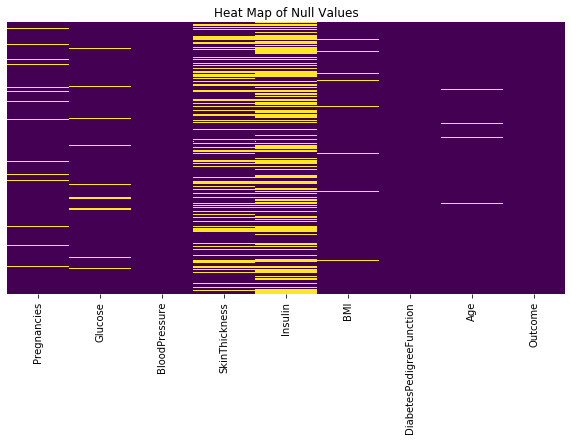

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heat Map of Null Values')

# Correlation among Data

Text(0.5, 1, 'Heat Map of Corelation Matrix')

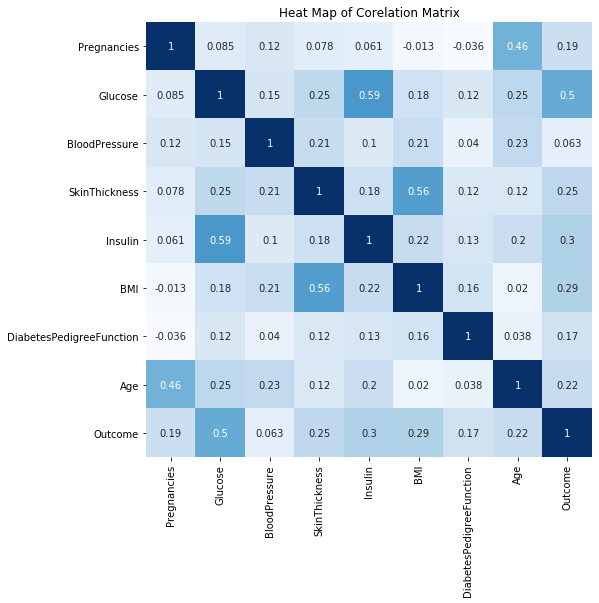

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', cbar=False)
plt.title('Heat Map of Corelation Matrix')

Text(0.5, 1.0, 'Exploring the coloums using the library matplotlib')

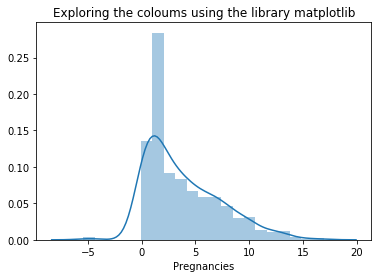

In [10]:
sns.distplot(df['Pregnancies'].dropna())
plt.title('Exploring the coloums using the library matplotlib')

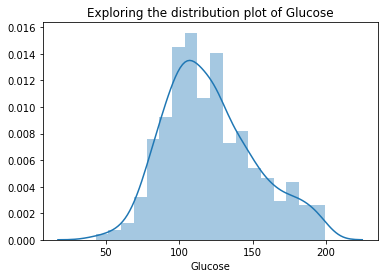

In [11]:
plt.title("Exploring the distribution plot of Glucose")

sns.distplot(df['Glucose'].dropna())

# Data Cleaning
Filling all missing values in the present data

## 1.Age

In [12]:

meanAge = int(df.Age.mean())
df['Age'].fillna(meanAge, inplace=True)

## 2.Pregnancy

In [13]:

age_breakpoints = [20,40,60,100]
age_labels = [1,2,3]
age_group = pd.cut(df['Age'], bins=age_breakpoints, labels=age_labels)

In [14]:
def imputePregnancies(cols):
    Pregnancies = cols[0]
    Age = cols[1]
    
    if pd.isnull(Pregnancies):
        if Age == 1:
            return 2
        elif Age == 2:
            return 6
        else:
            return 4
    else:
        return Pregnancies

In [15]:
df['Pregnancies'] = pd.concat([df['Pregnancies'], age_group], axis=1).apply(imputePregnancies,axis=1)

In [16]:
def correctPregnancies(pr):
    if pr < 0:
        return 0
    else:
        return pr

In [17]:
"""Preproccessing : Replacing the negative values with zero in pregnancies"""

df['Pregnancies'] = df['Pregnancies'].apply(correctPregnancies)

## 3.Glucose

In [18]:
"""Preproccessing : Replaceing the null values in Glucose with the mean value"""

meanGlucose = df.Glucose.mean()
df['Glucose'].fillna(meanGlucose, inplace=True)

In [19]:
def correctGlucose(gl):
    if gl < 0:
        return meanGlucose
    else:
        return gl

In [20]:
"""Preprocessing : Replacing the negative values of Glucose with mean value"""

df['Glucose'] = df['Glucose'].apply(correctGlucose)

## 4.BMI

In [21]:
"""Preprocessing : Replacing the null values of BMI with the mean value"""

meanBMI = df.BMI.mean()
df['BMI'].fillna(meanBMI, inplace=True)

In [22]:
def correctBMI(bmi):
    if bmi < 0:
        return meanBMI
    else:
        return bmi

In [23]:
"""Preprocessing : Replacing the negative values with mean in BMI"""

df['BMI'] = df['BMI'].apply(correctBMI)

## 5.Skin thickness

In [24]:
"""Preprocessing : Imputation of skin tickness using the bmi values"""

bmi_levels = [0, 25, 50, 75]
bmi_labels = [1, 2, 3]
bmi_class = pd.cut(df['BMI'], bins= bmi_levels, labels = bmi_labels)

Text(0.5, 1.0, 'Imputation of skin tickness using the bmi values')

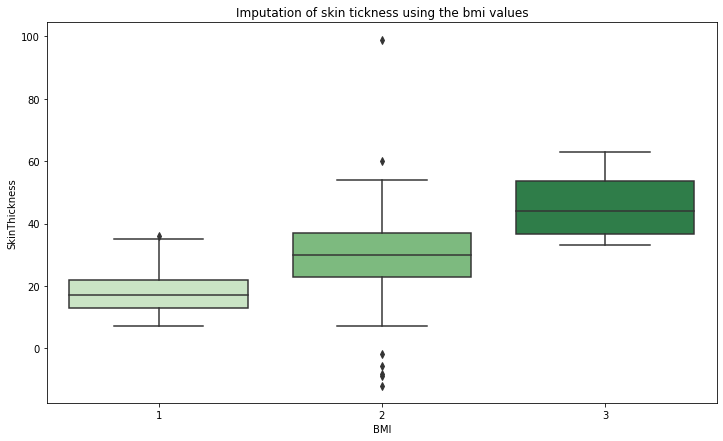

In [25]:
plt.figure(figsize=(12,7))
sns.boxplot(x=bmi_class, y='SkinThickness', data=df, palette='Greens')
plt.title('Imputation of skin tickness using the bmi values')

In [26]:
def imputeSkin(cols):
    Skin = cols[0]
    BMI = cols[1]
    
    if pd.isnull(Skin):
        if BMI == 1:
            return 33
        elif BMI == 2:
            return 38
        else:
            return 40
    else:
        return Skin

In [27]:
"""Preprocessing : Replacing the values using the imputation function with takes values of BMI in consideration"""

df['SkinThickness'] = pd.concat([df['SkinThickness'], bmi_class], axis=1).apply(imputeSkin, axis=1)

In [28]:
meanSkin = df.SkinThickness.mean()
def correctSkin(sk):
    if sk <= 0:
        return meanSkin
    else:
        return sk

In [29]:
"""Preprocessing : Replacing the skin thickness using the mean value if it is less than or equal to 0"""

df['SkinThickness'] = df['SkinThickness'].apply(correctSkin)

## 6.Blood Pressure

In [30]:
meanBloodPressure = df['BloodPressure'].mean()
def correctBP(bp):
    if bp < 0:
        return meanBloodPressure
    else:
        return bp

In [31]:
"""Preprocessing : Replacing the blood pressure using the mean value if it is less than or equal to 0"""

df['BloodPressure'] = df['BloodPressure'].apply(correctBP)

## 7.Insulin

In [32]:
"""Preprocessing : Replacing the Insulin values based on glucose values"""

glucose_vals = [40, 80, 120, 160, 200]
glucose_lbl = [1, 2, 3, 4]
glucose_class = pd.cut(df['Glucose'], bins = glucose_vals, labels = glucose_lbl)

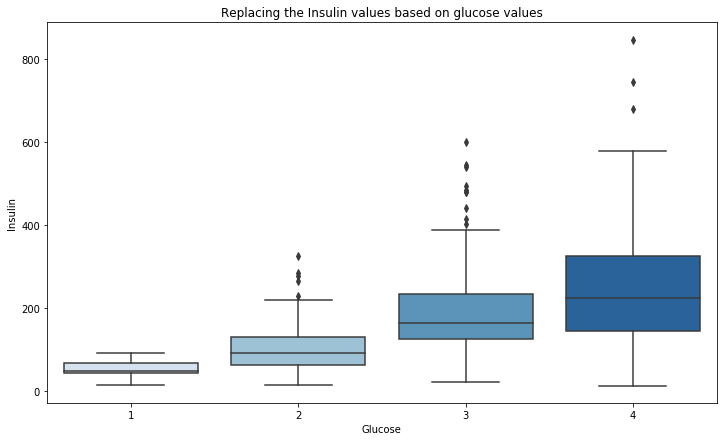

In [33]:
plt.figure(figsize=(12,7))
plt.title('Replacing the Insulin values based on glucose values')
sns.boxplot(x=glucose_class, y='Insulin', data=df, palette='Blues')

In [34]:
def imputeInsulin(cols):
    ins = cols[0]
    glucose = cols[1]
    if pd.isnull(ins):
        if glucose == 1:
            return 45
        elif glucose == 2:
            return 100
        elif glucose == 3:
            return 170
        else:
            return 200
    else:
        return ins

In [35]:
"""Preprocessing : Replacing the Insulin values based on the guclose values."""

df['Insulin'] = pd.concat([df['Insulin'],glucose_class], axis=1).apply(imputeInsulin, axis=1)

## Rechecking the Data after Clearing

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,170.0,33.600000,0.627,50.0,1
1,1.0,85.0,66.0,29.0,100.0,26.600000,0.351,31.0,0
2,8.0,183.0,64.0,33.0,200.0,23.300000,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,19.179925,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,1


In [37]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.838122,120.769083,69.164476,31.384734,143.236979,32.351889,0.471876,33.742501,0.348958
std,3.402841,30.518246,18.906990,9.598283,91.683010,7.035329,0.331329,12.144715,0.476951
min,0.000000,42.974768,0.000000,7.000000,14.000000,5.317899,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,100.000000,27.600000,0.243750,24.000000,0.000000
50%,3.000000,118.000000,72.000000,33.000000,114.000000,32.135665,0.372500,30.000000,0.000000
75%,6.000000,139.000000,80.000000,38.000000,170.000000,36.425000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


# Building the model

As we have to predict whether the patients have diabetes or not, this is a classificatkion problem.
There are only two classes "Yes" or "No" i.e. Binary Classification.
For Binary Classification, we can use Logistic Regression




## Test and Train Split

We apply test-train split on the data


In [39]:
"""Training : Sepreation of features and target columns"""

X = df[df.columns.drop(['Outcome'])]
y = df['Outcome']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
"""Training : Spliting the data in 70:30 ratio for traing and testing respectively"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training and Prediction

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [43]:
"""Training : Training the Logistic Regression model using the data"""
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
"""Testing : Testing the trained model using the test data."""

predictions = model.predict(X_test)

## Evaluation of Model

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
"""Testing : Confusion matrix showing the correctness of the outcome."""
print(confusion_matrix(y_test, predictions))

[[134  16]
 [ 36  45]]


In [46]:
from sklearn.metrics import classification_report
"""Testing : Report for correctness of the model(Logistic Regression)"""
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.74      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.74       231
weighted avg       0.77      0.77      0.77       231



## Accuracy

In [47]:
"""Total accuracy given by the Logistic Regression model for the given dataset"""
print("Accuracy = ", accuracy_score(y_test, predictions)*100)

Accuracy =  77.48917748917748
